6. Object detection using Transfer Learning of CNN architectures
<br>
a. Load in a pre-trained CNN model trained on a large dataset
<br>
b. Freeze parameters (weights) in model’s lower convolutional layers
<br>
c. Add custom classifier with several layers of trainable parameters to model
<br>
d. Train classifier layers on training data available for task
<br>
e. Fine-tune hyper parameters and unfreeze more layers as needed

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#### Pre processing img data 

In [4]:
dataset_dir = "/Users/amanprabhune/Downloads/LP-IV-datasets/Object Detection(Ass6)/caltech-101-img"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


#### Selecting first batch containing 2000 images as train and second batch containing 2000 images as test data

In [5]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


#### a. Load in a pre-trained CNN model trained on a large dataset

In [6]:
# Load VGG16 without top layers
weights_path = "/Users/amanprabhune/Downloads/LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

2023-11-16 01:28:35.085513: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-16 01:28:35.085561: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-16 01:28:35.085583: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-16 01:28:35.085634: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-16 01:28:35.085659: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### b. Freeze parameters (weights) in model’s lower convolutional layers

In [7]:
for layer in base_model.layers:
   layer.trainable = False

#### c. Add custom classifier with several layers of trainable parameters to model

In [9]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

#### d. Train classifier layers on training data available for task

In [10]:
# Train the model
model.fit(x_train, y_train,  epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2023-11-16 01:30:30.089588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 6s 88ms/step - loss: 3.7376 - accuracy: 0.2490 - val_loss: 3.0357 - val_accuracy: 0.3755
Epoch 2/10
63/63 [==============================] - 5s 84ms/step - loss: 2.6997 - accuracy: 0.4195 - val_loss: 2.5627 - val_accuracy: 0.4605
Epoch 3/10
63/63 [==============================] - 5s 84ms/step - loss: 2.1229 - accuracy: 0.5410 - val_loss: 2.2264 - val_accuracy: 0.5210
Epoch 4/10
63/63 [==============================] - 5s 85ms/step - loss: 1.7194 - accuracy: 0.6125 - val_loss: 2.0633 - val_accuracy: 0.5370
Epoch 5/10
63/63 [==============================] - 5s 85ms/step - loss: 1.4240 - accuracy: 0.6820 - val_loss: 1.9868 - val_accuracy: 0.5420
Epoch 6/10
63/63 [==============================] - 5s 85ms/step - loss: 1.1785 - accuracy: 0.7440 - val_loss: 1.8627 - val_accuracy: 0.5690
Epoch 7/10
63/63 [==============================] - 5s 84ms/step - loss: 0.9983 - accuracy: 0.7810 - val_loss: 1.8201 - val_accuracy: 0.5825
Epoch 8/10
63/63 [======

#### e. Fine-tune hyper parameters and unfreeze more layers as needed

In [15]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True

x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


2023-11-16 01:35:58.923806: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


32/32 [==============================] - 6s 173ms/step - loss: 4.1570 - accuracy: 0.2780 - val_loss: 3.2697 - val_accuracy: 0.3940
Epoch 2/20
32/32 [==============================] - 5s 162ms/step - loss: 2.6684 - accuracy: 0.4265 - val_loss: 2.8613 - val_accuracy: 0.4285
Epoch 3/20
32/32 [==============================] - 5s 162ms/step - loss: 2.0816 - accuracy: 0.5290 - val_loss: 2.7678 - val_accuracy: 0.4635
Epoch 4/20
32/32 [==============================] - 5s 162ms/step - loss: 1.5994 - accuracy: 0.6195 - val_loss: 2.3538 - val_accuracy: 0.5155
Epoch 5/20
32/32 [==============================] - 5s 163ms/step - loss: 1.2040 - accuracy: 0.6960 - val_loss: 2.5442 - val_accuracy: 0.5295
Epoch 6/20
32/32 [==============================] - 5s 162ms/step - loss: 0.9557 - accuracy: 0.7555 - val_loss: 2.5669 - val_accuracy: 0.5355
Epoch 7/20
32/32 [==============================] - 5s 162ms/step - loss: 0.7150 - accuracy: 0.8005 - val_loss: 2.6619 - val_accuracy: 0.5360
Epoch 8/20
32/32 

In [11]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 [==============================] - 3s 46ms/step


0.5879999995231628

In [19]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  sunflower
Actual:  sunflower


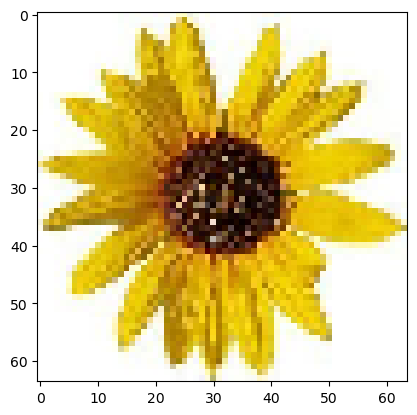

In [34]:
n = 4
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])